In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/congyu/.virtua

In [2]:
from seq_seq_annot_DS1DS2 import read_mitbih, demonstrate_classes_distribution

In [3]:
DATA_DIR = 'data/s2s_mitbih_aami_DS1DS2'
max_time = 10
classes = ["N", "S", "V"]
n_oversampling = 6000

In [4]:
X_train, y_train = read_mitbih(DATA_DIR, max_time, classes=classes, max_nlabel=50000, trainset=1)
X_test, y_test = read_mitbih(DATA_DIR, max_time, classes=classes, max_nlabel=50000, trainset=0)

Records processed!
Records processed!


In [5]:
print(X_train.shape)

(5052, 10, 280)


In [6]:
print(X_test.shape)

(4924, 10, 280)


In [9]:
np.unique(["".join(y) for y in y_test])

array(['NNNNNNNNNN', 'NNSSSSSSSS', 'SSSSSSSSSS', 'SSSSSSSSVV',
       'VVVVVVVVVV'], dtype='<U10')

In [7]:
print(y_train[:100])

[['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['N' 'N' '

In [8]:
demonstrate_classes_distribution(y_train, y_test)

Classes (training):  ['N' 'S' 'V']
N 45796
S 941
V 3773
Classes (test):  ['N' 'S' 'V']
N 44192
S 1836
V 3212


In [9]:
char2numY = dict(zip(classes, range(len(classes))))
# char2numY = {'N': 0, 'S': 1, 'V': 2}

char2numY['<GO>'] = len(char2numY)

num2charY = dict(zip(char2numY.values(), char2numY.keys()))

In [10]:
char2numY

{'N': 0, 'S': 1, 'V': 2, '<GO>': 3}

In [11]:
num2charY

{0: 'N', 1: 'S', 2: 'V', 3: '<GO>'}

In [12]:
def numerize_y(y_train, y_test, char2numY):
    y_train = [[char2numY['<GO>']] + [char2numY[y_] for y_ in date] for date in y_train]
    y_test = [[char2numY['<GO>']] + [char2numY[y_] for y_ in date] for date in y_test]
    y_test = np.asarray(y_test)
    y_train = np.asarray(y_train)
    return y_train, y_test


In [13]:
y_train, y_test = numerize_y(y_train, y_test, char2numY)

In [14]:
y_train.shape

(5051, 11)

In [18]:
y_test.shape

(4924, 11)

In [15]:
classes = np.unique(y_train)

In [16]:
# over-sampling: SMOTE
X_train = np.reshape(X_train, [X_train.shape[0] * X_train.shape[1], -1])
y_train = y_train[:, 1:].flatten()

nums = []
for cl in classes:
    ind = np.where(classes == cl)[0][0]
    nums.append(len(np.where(y_train.flatten() == ind)[0]))

# ratio={0:nums[0],1:nums[0],2:nums[0]}
# ratio={0:7000,1:nums[1],2:7000,3:7000}
ratio = {0: nums[0], 1: n_oversampling + 1000, 2: n_oversampling}

sm = SMOTE(random_state=12, sampling_strategy=ratio)
X_train, y_train = sm.fit_sample(X_train, y_train)

X_train = X_train[:(X_train.shape[0] // max_time) * max_time, :]
y_train = y_train[:(X_train.shape[0] // max_time) * max_time]

X_train = np.reshape(X_train, [-1, X_test.shape[1], X_test.shape[2]])
y_train = np.reshape(y_train, [-1, y_test.shape[1] - 1, ])
y_train = [[char2numY['<GO>']] + [y_ for y_ in date] for date in y_train]
y_train = np.array(y_train)

print('Classes in the training set: ', classes)
for cl in classes:
    ind = np.where(classes == cl)[0][0]
    print(cl, len(np.where(y_train.flatten() == ind)[0]))
print("------------------y_train samples--------------------")
for ii in range(2):
    print(''.join([num2charY[y_] for y_ in list(y_train[ii + 5])]))

print('Classes in the training set: ', classes)
for cl in classes:
    ind = np.where(classes == cl)[0][0]
    print(cl, len(np.where(y_test.flatten() == ind)[0]))

print("------------------y_test samples--------------------")
for ii in range(2):
    print(''.join([num2charY[y_] for y_ in list(y_test[ii + 5])]))

Classes in the training set:  [0 1 2 3]
0 45796
1 7000
2 5994
3 5879
------------------y_train samples--------------------
<GO>NNNNNNNNNN
<GO>NNNNNNNNNN
Classes in the training set:  [0 1 2 3]
0 44192
1 1836
2 3212
3 4924
------------------y_test samples--------------------
<GO>NNNNNNNNNN
<GO>NNNNNNNNNN


In [17]:
y_train.shape

(5879, 11)

In [8]:
classes = np.array(["a", "b", "c"])
for cl in classes:
        ind = np.where(classes == cl)[0]
        print(ind)

[0]
[1]
[2]


In [11]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

Counter({0: 990, 1: 10})
(1000, 2)
(1000,)
[[-0.12289294  0.11047044]
 [ 0.33605863 -1.33226151]
 [ 1.40439918  1.41694259]
 ...
 [ 0.80192205  0.75396037]
 [ 1.32341525  1.16672256]
 [ 1.06274061  0.24738282]]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

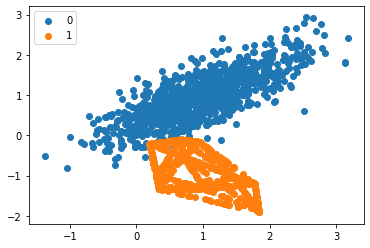

In [36]:

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# summarize class distribution
counter = Counter(y)
print(counter)

print(X.shape)
print(y.shape)

print(X)
print(y)

# transform the dataset
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)


print(X2)
print(y2.tolist())

print(np.all(X == X2[:len(X)]))

# summarize the new class distribution
counter = Counter(y2)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y2 == label)[0]
    pyplot.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()